In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data_titanic_proyecto.csv', sep=',')
data.values
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


## Data analisis

In [301]:
data.isnull().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [302]:
data.dtypes

PassengerId             int64
Name                   object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
passenger_class        object
passenger_sex          object
passenger_survived     object
dtype: object

In [303]:
data.passenger_class.unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

In [304]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [305]:
data.passenger_survived.unique()

array(['N', 'Y'], dtype=object)

In [306]:
data.passenger_sex.unique()

array(['M', 'F'], dtype=object)

In [3]:
data['Age'] = data['Age'].astype('float32')
data['Fare'] = data['Fare'].astype('float32')
data['Age'].fillna(data["Age"].median(skipna=True), inplace=True)

data['Ticket'] = data['Ticket'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['passenger_class'] = data['passenger_class'].astype('category').cat.codes
data['passenger_sex'] = data['passenger_sex'].astype('category').cat.codes
data['passenger_survived'] = data['passenger_survived'].astype('category').cat.codes

data.drop('Name', axis = 1, inplace = True)
data.drop('Cabin', axis = 1, inplace = True)
data.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,22.0,1,0,523,7.250000,2,0,1,0
1,2,38.0,1,0,596,71.283302,0,2,0,1
2,3,26.0,0,0,669,7.925000,2,0,0,1
3,4,35.0,1,0,49,53.099998,2,2,0,1
4,5,35.0,0,0,472,8.050000,2,0,1,0


In [4]:
#Nan's
data.isnull().sum()

PassengerId           0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
passenger_class       0
passenger_sex         0
passenger_survived    0
dtype: int64

In [5]:
data.describe()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,338.528620,32.204247,1.529742,0.691358,0.647587,0.383838
std,257.353842,13.019696,1.102743,0.806057,200.850657,49.693409,0.800254,0.836071,0.477990,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,337.000000,14.454200,2.000000,0.000000,1.000000,0.000000
75%,668.500000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000,1.000000,1.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,680.000000,512.329224,2.000000,2.000000,1.000000,1.000000


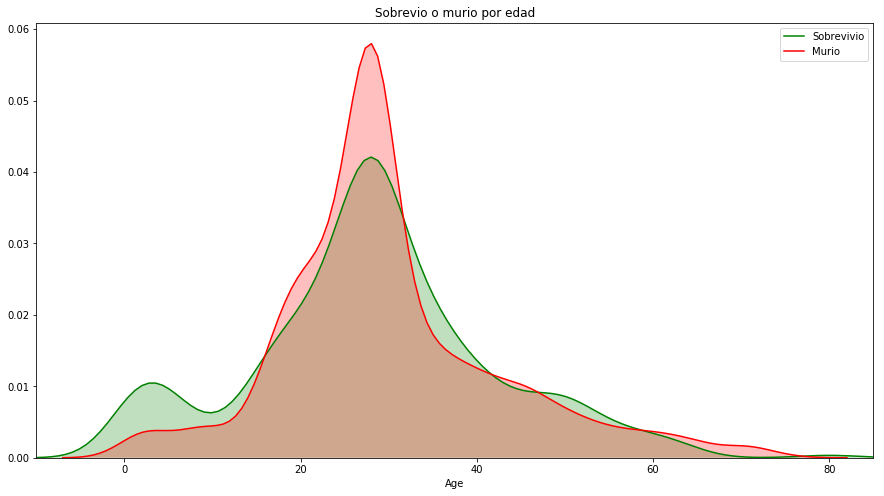

In [6]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Age"][data.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(data["Age"][data.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobrevivio', 'Murio'])
plt.title('Sobrevio o murio por edad')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

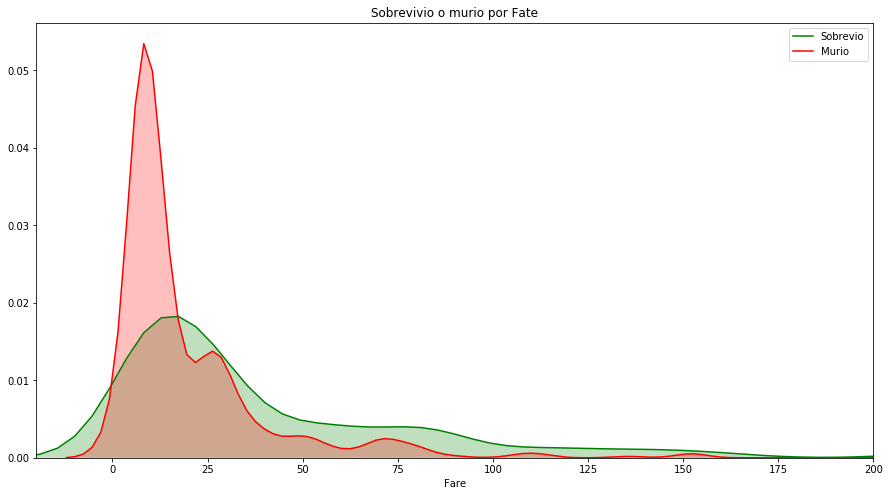

In [7]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Fare"][data.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(data["Fare"][data.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobrevio', 'Murio'])
plt.title('Sobrevivio o murio por Fate')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

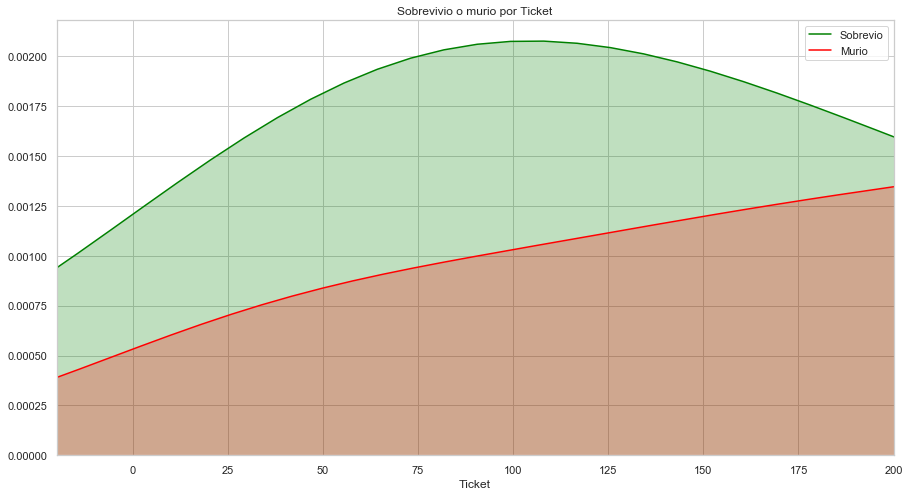

In [312]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Ticket"][data.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(data["Ticket"][data.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobrevio', 'Murio'])
plt.title('Sobrevivio o murio por Ticket')
ax.set(xlabel='Ticket')
plt.xlim(-20,200)
plt.show()

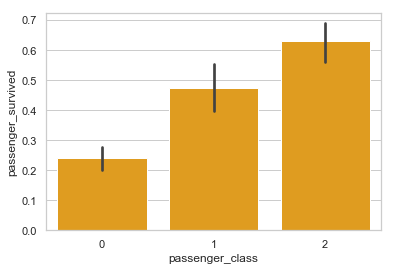

In [313]:
sns.barplot('passenger_class', 'passenger_survived', data=data, color="orange")
plt.show()

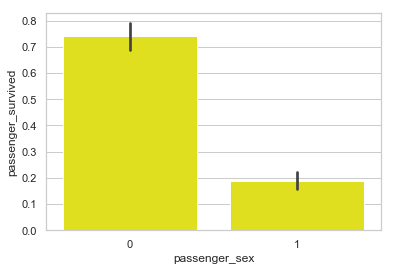

In [314]:
sns.barplot('passenger_sex', 'passenger_survived', data=data, color="yellow")
plt.show()

* **Passenger_survived**: N = 0, Y = 1
* **Passenger_sex**: M = 1, F = 0
* **Passenger_class**: Lower = 0, Upper = 2, Middle = 1
* **Embarked**: S = 2, C = 0, Q = 1

In [8]:
data.corr()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
PassengerId,1.000000,0.034212,-0.057527,-0.001652,-0.056554,0.012658,0.012985,0.035144,0.042939,-0.005007
Age,0.034212,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.031903,0.339898,0.081163,-0.064910
SibSp,-0.057527,-0.233296,1.000000,0.414838,0.079461,0.159651,0.071480,-0.083081,-0.114631,-0.035322
Parch,-0.001652,-0.172482,0.414838,1.000000,0.020003,0.216225,0.043351,-0.018443,-0.245489,0.081629
Ticket,-0.056554,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.011146,-0.319869,0.059372,-0.164549
Fare,0.012658,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.230365,0.549500,-0.182333,0.257307
Embarked,0.012985,-0.031903,0.071480,0.043351,0.011146,-0.230365,1.000000,-0.173511,0.118492,-0.176509
passenger_class,0.035144,0.339898,-0.083081,-0.018443,-0.319869,0.549500,-0.173511,1.000000,-0.131900,0.338481
passenger_sex,0.042939,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.118492,-0.131900,1.000000,-0.543351
passenger_survived,-0.005007,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.176509,0.338481,-0.543351,1.000000


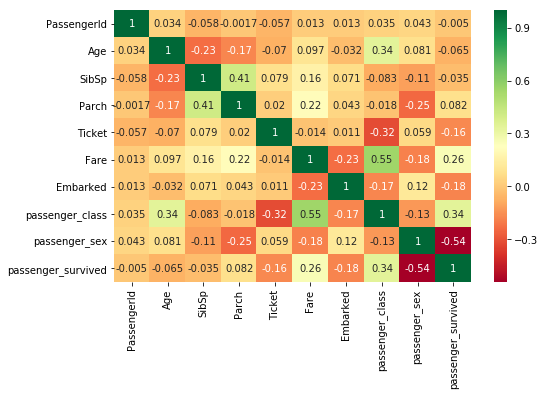

In [9]:
plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.23, random_state=42)
train, validation = train_test_split(train, test_size=0.1, random_state=42)
train.shape

(617, 10)

In [11]:
test.shape

(205, 10)

In [12]:
validation.shape

(69, 10)

In [13]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
to_predict = ['passenger_survived']

In [14]:
from sklearn import tree
def decision_tree(x, y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x, y)
    return clf


In [15]:
#train[train.columns[2:11]].sort_values(by=[''], inplace=True)
#train[train.columns[11]]
tree_model = decision_tree(train[features], train[to_predict])
tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test[to_predict], tree_model.predict(test[features]))
accuracy

0.7170731707317073

In [17]:
from sklearn.svm import SVC
def svm(x, y, kernel, degree, c):
    clf = SVC(gamma='scale', decision_function_shape='ovo', degree = degree, kernel = kernel, C = c)
    clf = clf.fit(x, y)
    return clf

In [18]:
svc_model = svm(train[features], train[to_predict], 'rbf', 3, 1)
svc_model

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
accuracy = accuracy_score(test[to_predict], svc_model.predict(test[features]))
accuracy

0.6634146341463415

In [20]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
def naive_bayes_scikit(x, y):
    gnb = GaussianNB()
    gnb = gnb.fit(x, y)
    return gnb


In [21]:
nb_model = naive_bayes_scikit(train[features], train[to_predict])
nb_model

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
accuracy = accuracy_score(test[to_predict], nb_model.predict(test[features]))
accuracy

0.7804878048780488

In [23]:
import collections 
import numpy as np
from math import sqrt, exp
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0] - n_0) - 1))
    return m, v # mean and variance 

def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            denominator = sqrt(2*3.14*v[i][j])
            if denominator == 0:
                continue
            product = product * (1/denominator) * exp(-0.5 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

def naive_bayes(X_train, y_train, x_test):
    predictions = np.zeros(x_test.shape[0])
    predictions.shape
    for i in range(0, predictions.shape[0]):
        x = x_test[i]
        m, v, pre_probab, pfc, pcf, prediction = GNB(X_train, y_train, x)
        predictions[i] = prediction
    return predictions

In [24]:
X_train = np.array(train[features])
y_train = np.array(train['passenger_survived'])
x_test = np.array(test[features])

predictions = naive_bayes(X_train, y_train, x_test)

In [25]:
accuracy = accuracy_score(test[to_predict], predictions)
accuracy

0.775609756097561

In [26]:
import time
import math
import tensorflow as tf
target = to_predict
# features = ["passenger_class", "passenger_sex","Fare", "Age"]

train_data = train[features].as_matrix()
test_data = test[features].as_matrix()
val_data = validation[features].as_matrix()
X_train = train_data[100:,:]
y_train = train_data[100:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:100,:]
y_val = val_data[:100,:]
y_val = np.reshape(y_val,-1)
X_test = test_data
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)

def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False, learning_rate = 0.001, rl = 0.001):
    
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [cost_op,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in np.arange(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {x: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"
              .format(total_loss,total_correct,e+1))
        if plot_losses and (e == epochs-1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

Train data shape:  (517, 5)
Train labels shape:  (2585,)
Validation data shape:  (69, 5)
Validation labels shape:  (345,)
Test data shape:  (205, 5)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [27]:
def logisticRegression(session, Xd, yd, epochs=1, batch_size=64, print_every=100,
                       plot_losses=False, learning_rate = 0.001, rl = 0.001, training = False):
        # clear old variables
#     tf.reset_default_graph()
        
    numFeatures = Xd.shape[1]
    numLabels = 2
    
    x = tf.placeholder(tf.float32, [None, numFeatures], name = 'x')
    y = tf.placeholder(tf.int64, [None], name = 'y')
    is_training = tf.placeholder(tf.bool)
    
    Lambda = rl #Regularization Parameter
    learningRate = tf.train.exponential_decay(learning_rate= learning_rate,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.90,
                                          staircase=True)
#     learningRate = learning_rate
    with tf.variable_scope("model", reuse=tf.AUTO_REUSE):
        weights=tf.get_variable("weights",shape=[numFeatures,numLabels])
        bias=tf.get_variable("bias",shape=[numLabels])
        y_out = tf.matmul(x,weights)+bias

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.one_hot(y,2),logits=y_out))
    regularizer = tf.nn.l2_loss(weights)
    cost_op = tf.reduce_mean(loss + Lambda * regularizer)
    optimizer = tf.train.GradientDescentOptimizer(learningRate)
    train_step = optimizer.minimize(cost_op)
    prediction = tf.argmax(y_out,1)
    #Lets strat a session
    
    
#     sess = tf.Session()
#     sess.run(tf.global_variables_initializer())

    if training is True:
        session.run(tf.global_variables_initializer())
    
#     run_model(predict = y_out, loss_val = cost_op, Xd = Xd, yd = yd, y = y, epochs = epochs, 
#               batch_size = batch_size, print_every = print_every, training = training, plot_losses = plot_losses)

    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(y_out,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])

    training_now = training is not False
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [cost_op,correct_prediction,accuracy]
    if training_now:
        variables[-1] = train_step
    
    # counter 
    #Lets strat a session
    
    iter_cnt = 0
    for e in np.arange(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {x: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        if e % print_every == 0:
            print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"
              .format(total_loss,total_correct,e+1))
        if plot_losses and (e == epochs-1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
            
        
    return (total_loss,total_correct, session, y_out, cost_op, prediction)

Training
Instructions for updating:
Colocations handled automatically by placer.
Iteration 0: with minibatch training loss = 11.8 and accuracy of 0.19
Epoch 1, Overall loss = 12.2 and accuracy of 0.211
Iteration 1000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 2000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 3000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 4000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 5000: with minibatch training loss = 11.8 and accuracy of 0.19
Epoch 1001, Overall loss = 12.2 and accuracy of 0.211
Iteration 6000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 7000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 8000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 9000: with minibatch training loss = 11.8 and accuracy of 0.19
Iteration 10000: with minibatch training loss = 11.8 and accuracy of 0.19
Epoch 2001, O

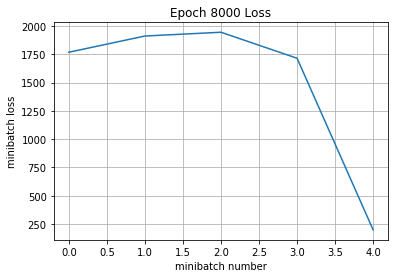

Validation
Epoch 1, Overall loss = 11 and accuracy of 0.188
Epoch 101, Overall loss = 11 and accuracy of 0.188
Epoch 201, Overall loss = 11 and accuracy of 0.188
Epoch 301, Overall loss = 11 and accuracy of 0.188
Epoch 401, Overall loss = 11 and accuracy of 0.188
Epoch 501, Overall loss = 11 and accuracy of 0.188
Epoch 601, Overall loss = 11 and accuracy of 0.188
Epoch 701, Overall loss = 11 and accuracy of 0.188
Epoch 801, Overall loss = 11 and accuracy of 0.188
Epoch 901, Overall loss = 11 and accuracy of 0.188
Epoch 1001, Overall loss = 11 and accuracy of 0.188
Epoch 1101, Overall loss = 11 and accuracy of 0.188
Epoch 1201, Overall loss = 11 and accuracy of 0.188
Epoch 1301, Overall loss = 11 and accuracy of 0.188
Epoch 1401, Overall loss = 11 and accuracy of 0.188
Epoch 1501, Overall loss = 11 and accuracy of 0.188
Epoch 1601, Overall loss = 11 and accuracy of 0.188
Epoch 1701, Overall loss = 11 and accuracy of 0.188
Epoch 1801, Overall loss = 11 and accuracy of 0.188
Epoch 1901, O

(10.955528259277344,
 0.18840579710144928,
 <tf.Tensor 'model_1/add:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'Mean_4:0' shape=() dtype=float32>,
 <tf.Tensor 'ArgMax_2:0' shape=(?,) dtype=int64>)

In [28]:
print('Training')
X_train = train_data[:,:]
y_train = train_data[:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:,:]
y_val = val_data[:,:]
y_val = np.reshape(y_val,-1)
X_test = test_data

tf.reset_default_graph()
session = tf.Session()

total_loss, total_correct, sess, y_out, cost_op, _ = logisticRegression(session = session, Xd = X_train, yd = y_train,
                   epochs = 8000, batch_size = 150, print_every = 1000, 
                   plot_losses = True, learning_rate = 0.0000000000001, rl = 0.001, training = True)

print('Validation')
# run_model(session,y_out,cost_op,X_val,y_val,1,100)
logisticRegression(session = session, Xd = X_val, yd = y_val,
                   epochs = 8000, batch_size = 150, training = False)




In [29]:
from sklearn import metrics
def getMetrics(Y, y_hat):
    accuracy = metrics.accuracy_score(Y, y_hat)
    f1 = metrics.f1_score(Y, y_hat)
    recall = metrics.recall_score(Y, y_hat)
    precision = metrics.precision_score(Y, y_hat)
    error = metrics.mean_squared_error(Y, y_hat)
    return (accuracy, f1, recall, precision, error)

def printMetrics(Y, y_hat):
    accuracy, f1, recall, precision, error = getMetrics(Y, y_hat)
    print('Accuracy ', accuracy)
    print('F1 ', f1)
    print('Recall ', recall)
    print('Precision ', precision)
    print('MSE ', error)
#     print(metrics.confusion_matrix(Y, y_hat))
    

## Entrenando modelo

In [30]:
list(train.columns)

['PassengerId',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'passenger_class',
 'passenger_sex',
 'passenger_survived']

In [31]:
features = ['Ticket', 'passenger_sex', 'passenger_class', 'Fare', 'Embarked']
to_predict = ['passenger_survived']
tree_model = decision_tree(train[features], train[to_predict])
printMetrics(test[to_predict], tree_model.predict(test[features]))

Accuracy  0.8048780487804879
F1  0.7590361445783131
Recall  0.75
Precision  0.7682926829268293
MSE  0.1951219512195122


In [32]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
svc_model = svm(train[features], train[to_predict], 'poly', 3, 1.2)
printMetrics(test[to_predict], svc_model.predict(test[features]))

Accuracy  0.6195121951219512
F1  0.1875
Recall  0.10714285714285714
Precision  0.75
MSE  0.3804878048780488


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
features = ['Ticket', 'Parch', 'SibSp','passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
nb_model = naive_bayes_scikit(train[features], train[to_predict])
printMetrics(test[to_predict], nb_model.predict(test[features]))

Accuracy  0.7853658536585366
F1  0.7441860465116279
Recall  0.7619047619047619
Precision  0.7272727272727273
MSE  0.2146341463414634


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
X_train = np.array(train[features])
y_train = np.array(train['passenger_survived'])
x_test = np.array(test[features])

predictions = naive_bayes(X_train, y_train, x_test)
printMetrics(test[to_predict], predictions)

Accuracy  0.7853658536585366
F1  0.7441860465116279
Recall  0.7619047619047619
Precision  0.7272727272727273
MSE  0.2146341463414634


Training
Iteration 0: with minibatch training loss = 10.3 and accuracy of 0.25
Epoch 1, Overall loss = 11.6 and accuracy of 0.224


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Iteration 1000: with minibatch training loss = 2.05 and accuracy of 0.28
Iteration 2000: with minibatch training loss = 1.27 and accuracy of 0.15
Iteration 3000: with minibatch training loss = 1.06 and accuracy of 0.38
Iteration 4000: with minibatch training loss = 0.888 and accuracy of 0.12
Iteration 5000: with minibatch training loss = 0.8 and accuracy of 0.38
Iteration 6000: with minibatch training loss = 0.706 and accuracy of 0.15
Iteration 7000: with minibatch training loss = 0.674 and accuracy of 0.33
Iteration 8000: with minibatch training loss = 0.618 and accuracy of 0.17
Iteration 9000: with minibatch training loss = 0.613 and accuracy of 0.3
Iteration 10000: with minibatch training loss = 0.575 and accuracy of 0.17
Iteration 11000: with minibatch training loss = 0.583 and accuracy of 0.3
Iteration 12000: with minibatch training loss = 0.554 and accuracy of 0.17
Iteration 13000: with minibatch training loss = 0.569 and accuracy of 0.3
Iteration 14000: with minibatch training l

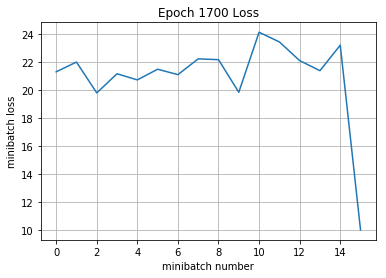

0.5446999128092823
0.23014586709886548


In [35]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
print('Training')

train_data = train[features].as_matrix()
test_data = test[features].as_matrix()
val_data = validation[features].as_matrix()

X_train = train_data[:,:]
y_train = train_data[:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:,:]
y_val = val_data[:,:]
y_val = np.reshape(y_val,-1)
X_test = test_data

tf.reset_default_graph()
session = tf.Session()

total_loss, total_correct, sess, y_out, cost_op, _ = logisticRegression(session = session, Xd = X_train, yd = y_train,
                   epochs = 1700, batch_size = 40, print_every = 1000, 
                   plot_losses = True, learning_rate = 0.0001, rl = 1.8, training = True)
print(total_loss)
print(total_correct)

# print('Validation')
# run_model(session,y_out,cost_op,X_val,y_val,1,100)
# logisticRegression(session = session, Xd = X_val, yd = y_val,
#                    epochs = 8000, batch_size = 150, training = False)


## K-fold

En general esta tecnica nos permite tener menos error en comparación con otros metodos porque asegura que cada observación del dataset original tienel chance de aparecer en el training set y el test set. El mas recomendado si tenemos poca data.

Para aplicarlo al este proyecto debemos
 * Dividad toda la data de manera aleatoria entre k folds, que debería estar en tre 5 y 10 dependiendo del tamaño de la data.
 * Luego entre el modelo usando el k - 1 y usando los restantes para validar los datos, anotar los errores.
 * Repetir este proceso hasta que cada k fold sirvio para probar el test. De ultimo sacar el promedio de los errores anotados y ese sera la metrica de performance del modelo
 
El paquete de scikit learn tiene sus herramientas para crearlo de manera sencilla

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]


## Prueba / Evaluación final

In [36]:
from joblib import dump, load
train_data = train[features].values
test_data = test[features].values
val_data = validation[features].values

In [37]:
tree_features = ['Ticket', 'passenger_sex', 'passenger_class', 'Fare', 'Embarked']
tree_results = tree_model.predict(test[tree_features])
dump(tree_model, 'tree.joblib') 

['tree.joblib']

In [38]:
svc_features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
svc_results = svc_model.predict(test[svc_features])
dump(svc_model, 'svc.joblib') 

['svc.joblib']

In [48]:
nb_features = ['Ticket', 'Parch', 'SibSp','passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
# nb_results = nb_model.predict(test[nb_features])

X_train = np.array(train[nb_features])
y_train = np.array(train['passenger_survived'])
x_test = np.array(test[nb_features])

x_train_df = train[nb_features]
x_train_df.to_csv(index = False, path_or_buf = 'nb_x_train.csv')
y_train_df = train['passenger_survived']
y_train_df.to_csv(index = False, path_or_buf = 'nb_y_train.csv')


nb_results = naive_bayes(X_train, y_train, x_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [549]:
results = pd.DataFrame({'Tree': tree_results, 
                        'SVC': svc_results, 
                        'NB': nb_results}
                       , index = test['PassengerId'])
results

,Tree,SVC,NB
PassengerId,,,
710,1,0,0.0
440,0,0,0.0
841,0,0,0.0
721,1,0,1.0
40,0,0,1.0
291,1,0,1.0
301,0,0,1.0
334,0,0,0.0
209,0,0,1.0


In [550]:
mode = results.mode(axis = 'columns')
final_results = pd.DataFrame({'Predict': mode[0].values, 'Real': test['passenger_survived'].values})
printMetrics(final_results['Real'], final_results['Predict'])

Accuracy  0.8
F1  0.7210884353741497
Recall  0.6309523809523809
Precision  0.8412698412698413
MSE  0.2


In [551]:
final_results

,Predict,Real
0,0.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,0.0,1
5,1.0,1
6,0.0,1
7,0.0,0
8,0.0,1
9,1.0,1


# Conclusiones y Recomendaciones

 * Con datos reales tan poco relaciones, ya que ninguna variables demuestra una relación directa con la variable a predecir, resulto interesante la estrategía ensamble.
 * La transformación de datos fue fundamental para el procesamiento correcto de los datos, incluso creo que se podría mejorar la relación o algun transformación mas.
 * Es mucho mas facil usar scikit learn que tensorflow